# Multi linear regression 

We want to compute a multi linear regression between the parameter values for each perturbation and the PCs values of the first EOF analysis of radiative feedbacks (SW and LW multivariate analysis). 

#### Emulator equation : Y = f(X) 
* Y is a 1x50 matrix containing the PCs values of the first EOF analysis of radiative feedbacks (SW and LW multivariate analysis).
* X is a 30X50 matrix containing the 30 values of the physical parameters, for the 50 perturbations.

## Import modules

In [1]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *

# Plotting modules 
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix
import seaborn as sns; sns.set()

# Scikit-learn
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

# Fonctions

In [5]:
def MultiLinReg_eq(reg_coeff, reg_intercept, X) :
    Coeffs = pd.DataFrame([reg_coeff]*30, columns=param_names).iloc[0]
    X_df = pd.DataFrame(data=X)
    R = reg_intercept

    N=len(X_df.values)
    tmp = [0]*N
    y_eq = [0]*N
    i=0
    Ycpt=0
    while i<N:
        tmp[i] = Coeffs.values*X_df.iloc[i]
        y_eq[i] = tmp[i].sum()+R
        i+=1
        
    return y_eq  

In [6]:
def build_MultiLinreg_df(y_true, y_eq, start, end):

    DFYeq = pd.DataFrame([y_true, y_eq], index=['y_true', 'y_eq']).transpose()
    DFYeq['members'] = nb_p_list[start:end]
    DFYeq['members_0'] = range(start,end,1)
    #DF=DFYeq.sort_values(by='y_true')
    return DFYeq

In [14]:
def plot(title, DFYeq, DFYeq_test, xlabel, ylabel) :
    plt.subplots(figsize=(10,8))

    ax = plt.gca()

    DFYeq.plot(kind='scatter', x='y_true', y='y_eq', color='green',  
                     marker="o", ax = ax)
    DFYeq_test.plot(kind='scatter', x='y_true', y='y_eq', color='navy',  
                     marker="o", ax = ax)

    plt.xlabel(xlabel, fontsize = 18)#, fontsize=18)
    plt.ylabel(ylabel, fontsize = 18)#, fontsize=18)
    plt.legend(['Training set', 'Test set'], fontsize = 16)
    plt.title(title, fontsize = 22)#, fontsize=22)
    plt.ylim(-4,4)
    plt.xlim(-4,4)
    ax.plot((-4, 4), (-4, 4), linewidth=1.0, color='gray', alpha=0.2)

In [7]:
nb_p_list = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412',
                    'p414','p416',
                    'p413','p419','p424','p426','p428','p421','p423',
                    'p425','p427','p429','p430','p436','p438','p431','p433',
                    'p442','p446','p443','p445','p447',
                    'p452','p454','p456','p458','p457','p459',
                    'p460','p465','p467','p469',
                    'p470','p471']

## Multi Linear Regression model PC1 - EOF1

In [42]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF1pc_tas.npy")
#y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS_paramNames.npy")

In [43]:
X_train = X[:80,:]
X_test = X[80:,:]
y_train = y[:80]
y_test = y[80:]

In [44]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
reg_coeff = regr.coef_
reg_intercept = regr.intercept_
X = X_train
eof1_y_eq_train = MultiLinReg_eq(reg_coeff, reg_intercept, X)

y_true = y_train
y_eq = eof1_y_eq_train
start = 0
end = 80
DFYeq_eof1_train = build_MultiLinreg_df(y_true, y_eq, start, end)

In [46]:
reg_coeff = regr.coef_
reg_intercept = regr.intercept_
X = X_test
eof1_y_eq_test = MultiLinReg_eq(reg_coeff, reg_intercept, X)

y_true = y_test
y_eq = eof1_y_eq_test
start = 80
end = 102
DFYeq_eof1_test = build_MultiLinreg_df(y_true, y_eq, start, end)

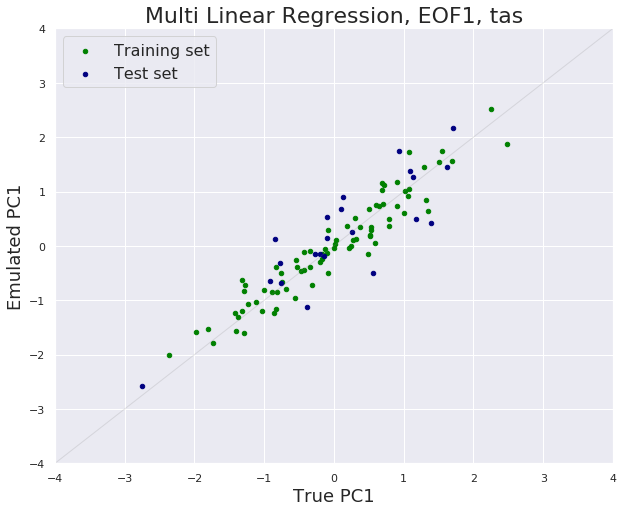

In [47]:
title = 'Multi Linear Regression, EOF1, tas'
DFYeq = DFYeq_eof1_train
DFYeq_test = DFYeq_eof1_test
xlabel = 'True PC1'
ylabel = 'Emulated PC1'
plot(title, DFYeq, DFYeq_test, xlabel, ylabel)

## Multi Linear Regression model PC2 - EOF2

In [48]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF2pc_tas.npy")
#y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS_paramNames.npy")

In [49]:
X_train = X[:80,:]
X_test = X[80:,:]
y_train = y[:80]
y_test = y[80:]

In [50]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
reg_coeff = regr.coef_
reg_intercept = regr.intercept_
X = X_train
eof1_y_eq_train = MultiLinReg_eq(reg_coeff, reg_intercept, X)

y_true = y_train
y_eq = eof1_y_eq_train
start = 0
end = 80
DFYeq_eof1_train = build_MultiLinreg_df(y_true, y_eq, start, end)

In [52]:
reg_coeff = regr.coef_
reg_intercept = regr.intercept_
X = X_test
eof1_y_eq_test = MultiLinReg_eq(reg_coeff, reg_intercept, X)

y_true = y_test
y_eq = eof1_y_eq_test
start = 80
end = 102
DFYeq_eof1_test = build_MultiLinreg_df(y_true, y_eq, start, end)

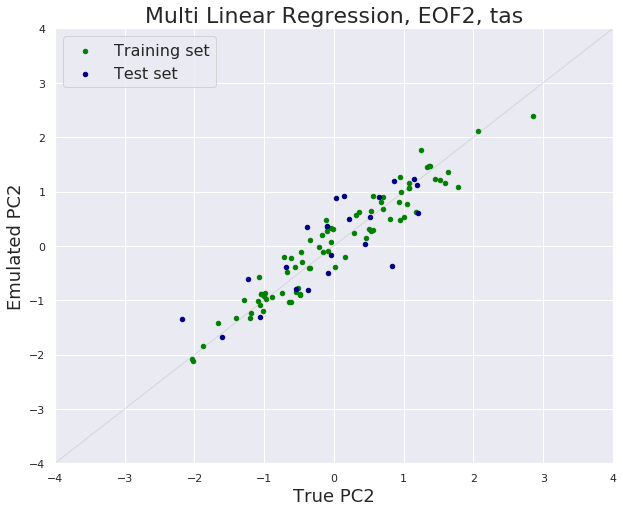

In [53]:
title = 'Multi Linear Regression, EOF2, tas'
DFYeq = DFYeq_eof1_train
DFYeq_test = DFYeq_eof1_test
xlabel = 'True PC2'
ylabel = 'Emulated PC2'
plot(title, DFYeq, DFYeq_test, xlabel, ylabel)

## Multi Linear Regression model PC3 - EOF3

In [55]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF3pc_tas.npy")
#y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS_paramNames.npy")

In [56]:
X_train = X[:80,:]
X_test = X[80:,:]
y_train = y[:80]
y_test = y[80:]

In [57]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
reg_coeff = regr.coef_
reg_intercept = regr.intercept_
X = X_train
eof1_y_eq_train = MultiLinReg_eq(reg_coeff, reg_intercept, X)

y_true = y_train
y_eq = eof1_y_eq_train
start = 0
end = 80
DFYeq_eof1_train = build_MultiLinreg_df(y_true, y_eq, start, end)

In [59]:
reg_coeff = regr.coef_
reg_intercept = regr.intercept_
X = X_test
eof1_y_eq_test = MultiLinReg_eq(reg_coeff, reg_intercept, X)

y_true = y_test
y_eq = eof1_y_eq_test
start = 80
end = 102
DFYeq_eof1_test = build_MultiLinreg_df(y_true, y_eq, start, end)

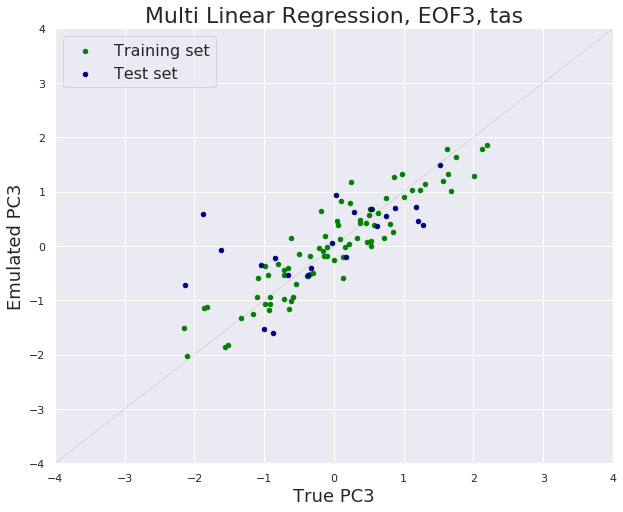

In [60]:
title = 'Multi Linear Regression, EOF3, tas'
DFYeq = DFYeq_eof1_train
DFYeq_test = DFYeq_eof1_test
xlabel = 'True PC3'
ylabel = 'Emulated PC3'
plot(title, DFYeq, DFYeq_test, xlabel, ylabel)

## Multi Linear Regression model PC4 - EOF4

In [61]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF4pc_tas.npy")
#y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS_paramNames.npy")

In [62]:
X_train = X[:80,:]
X_test = X[80:,:]
y_train = y[:80]
y_test = y[80:]

In [63]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
reg_coeff = regr.coef_
reg_intercept = regr.intercept_
X = X_train
eof1_y_eq_train = MultiLinReg_eq(reg_coeff, reg_intercept, X)

y_true = y_train
y_eq = eof1_y_eq_train
start = 0
end = 80
DFYeq_eof1_train = build_MultiLinreg_df(y_true, y_eq, start, end)

In [65]:
reg_coeff = regr.coef_
reg_intercept = regr.intercept_
X = X_test
eof1_y_eq_test = MultiLinReg_eq(reg_coeff, reg_intercept, X)

y_true = y_test
y_eq = eof1_y_eq_test
start = 80
end = 102
DFYeq_eof1_test = build_MultiLinreg_df(y_true, y_eq, start, end)

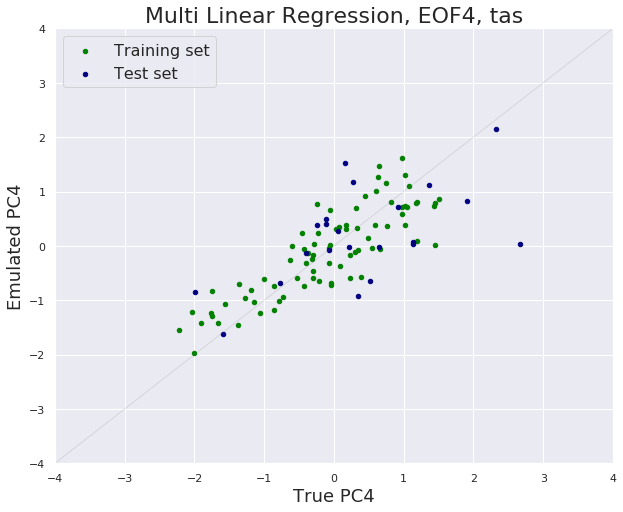

In [66]:
title = 'Multi Linear Regression, EOF4, tas'
DFYeq = DFYeq_eof1_train
DFYeq_test = DFYeq_eof1_test
xlabel = 'True PC4'
ylabel = 'Emulated PC4'
plot(title, DFYeq, DFYeq_test, xlabel, ylabel)

## Multi Linear Regression model PC5 - EOF5

In [67]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF5pc_tas.npy")
#y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS_paramNames.npy")

In [68]:
X_train = X[:80,:]
X_test = X[80:,:]
y_train = y[:80]
y_test = y[80:]

In [69]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
reg_coeff = regr.coef_
reg_intercept = regr.intercept_
X = X_train
eof1_y_eq_train = MultiLinReg_eq(reg_coeff, reg_intercept, X)

y_true = y_train
y_eq = eof1_y_eq_train
start = 0
end = 80
DFYeq_eof1_train = build_MultiLinreg_df(y_true, y_eq, start, end)

In [71]:
reg_coeff = regr.coef_
reg_intercept = regr.intercept_
X = X_test
eof1_y_eq_test = MultiLinReg_eq(reg_coeff, reg_intercept, X)

y_true = y_test
y_eq = eof1_y_eq_test
start = 80
end = 102
DFYeq_eof1_test = build_MultiLinreg_df(y_true, y_eq, start, end)

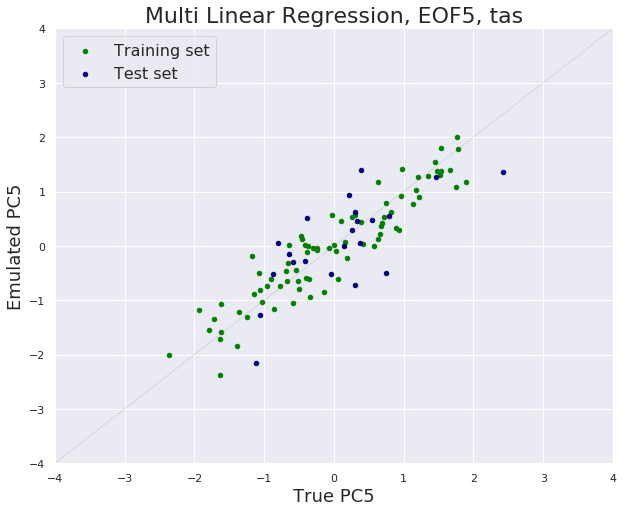

In [72]:
title = 'Multi Linear Regression, EOF5, tas'
DFYeq = DFYeq_eof1_train
DFYeq_test = DFYeq_eof1_test
xlabel = 'True PC5'
ylabel = 'Emulated PC5'
plot(title, DFYeq, DFYeq_test, xlabel, ylabel)

## Multi Linear Regression model PC6 - EOF6

In [73]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF6pc_tas.npy")
#y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS_paramNames.npy")

In [74]:
X_train = X[:80,:]
X_test = X[80:,:]
y_train = y[:80]
y_test = y[80:]

In [75]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
reg_coeff = regr.coef_
reg_intercept = regr.intercept_
X = X_train
eof1_y_eq_train = MultiLinReg_eq(reg_coeff, reg_intercept, X)

y_true = y_train
y_eq = eof1_y_eq_train
start = 0
end = 80
DFYeq_eof1_train = build_MultiLinreg_df(y_true, y_eq, start, end)

In [77]:
reg_coeff = regr.coef_
reg_intercept = regr.intercept_
X = X_test
eof1_y_eq_test = MultiLinReg_eq(reg_coeff, reg_intercept, X)

y_true = y_test
y_eq = eof1_y_eq_test
start = 80
end = 102
DFYeq_eof1_test = build_MultiLinreg_df(y_true, y_eq, start, end)

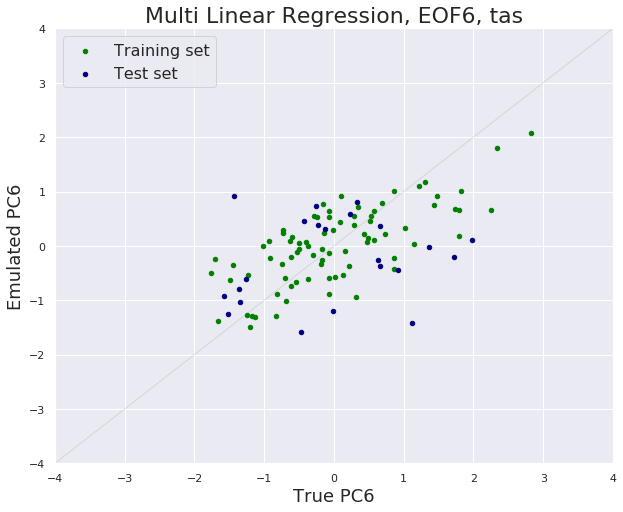

In [78]:
title = 'Multi Linear Regression, EOF6, tas'
DFYeq = DFYeq_eof1_train
DFYeq_test = DFYeq_eof1_test
xlabel = 'True PC6'
ylabel = 'Emulated PC6'
plot(title, DFYeq, DFYeq_test, xlabel, ylabel)

## Multi Linear Regression model PC7 - EOF7

In [79]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF7pc_tas.npy")
#y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS_paramNames.npy")

In [80]:
X_train = X[:80,:]
X_test = X[80:,:]
y_train = y[:80]
y_test = y[80:]

In [81]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
reg_coeff = regr.coef_
reg_intercept = regr.intercept_
X = X_train
eof1_y_eq_train = MultiLinReg_eq(reg_coeff, reg_intercept, X)

y_true = y_train
y_eq = eof1_y_eq_train
start = 0
end = 80
DFYeq_eof1_train = build_MultiLinreg_df(y_true, y_eq, start, end)

In [83]:
reg_coeff = regr.coef_
reg_intercept = regr.intercept_
X = X_test
eof1_y_eq_test = MultiLinReg_eq(reg_coeff, reg_intercept, X)

y_true = y_test
y_eq = eof1_y_eq_test
start = 80
end = 102
DFYeq_eof1_test = build_MultiLinreg_df(y_true, y_eq, start, end)

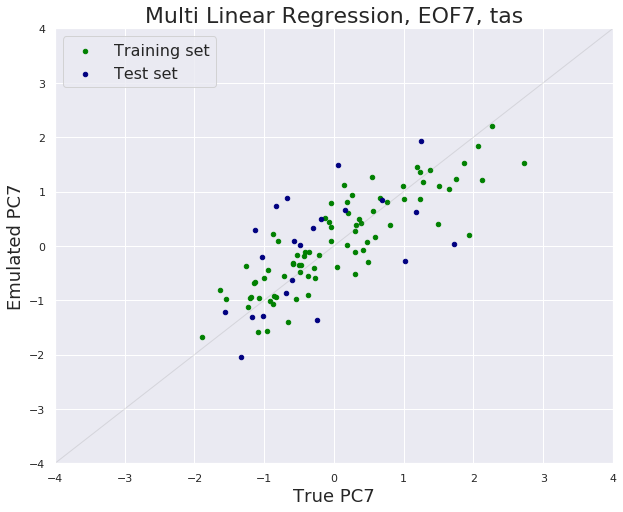

In [84]:
title = 'Multi Linear Regression, EOF7, tas'
DFYeq = DFYeq_eof1_train
DFYeq_test = DFYeq_eof1_test
xlabel = 'True PC7'
ylabel = 'Emulated PC7'
plot(title, DFYeq, DFYeq_test, xlabel, ylabel)

## Multi Linear Regression model PC8 - EOF8

In [85]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF8pc_tas.npy")
#y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS_paramNames.npy")

In [86]:
X_train = X[:80,:]
X_test = X[80:,:]
y_train = y[:80]
y_test = y[80:]

In [87]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
reg_coeff = regr.coef_
reg_intercept = regr.intercept_
X = X_train
eof1_y_eq_train = MultiLinReg_eq(reg_coeff, reg_intercept, X)

y_true = y_train
y_eq = eof1_y_eq_train
start = 0
end = 80
DFYeq_eof1_train = build_MultiLinreg_df(y_true, y_eq, start, end)

In [89]:
reg_coeff = regr.coef_
reg_intercept = regr.intercept_
X = X_test
eof1_y_eq_test = MultiLinReg_eq(reg_coeff, reg_intercept, X)

y_true = y_test
y_eq = eof1_y_eq_test
start = 80
end = 102
DFYeq_eof1_test = build_MultiLinreg_df(y_true, y_eq, start, end)

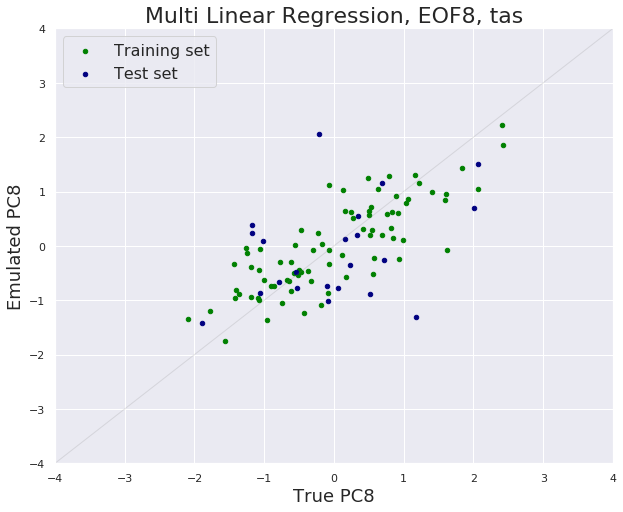

In [90]:
title = 'Multi Linear Regression, EOF8, tas'
DFYeq = DFYeq_eof1_train
DFYeq_test = DFYeq_eof1_test
xlabel = 'True PC8'
ylabel = 'Emulated PC8'
plot(title, DFYeq, DFYeq_test, xlabel, ylabel)